In [1]:
from matplotlib import pyplot as plt
from sys import path
path.append('../code/')
from evo_tracks import *


%matplotlib inline

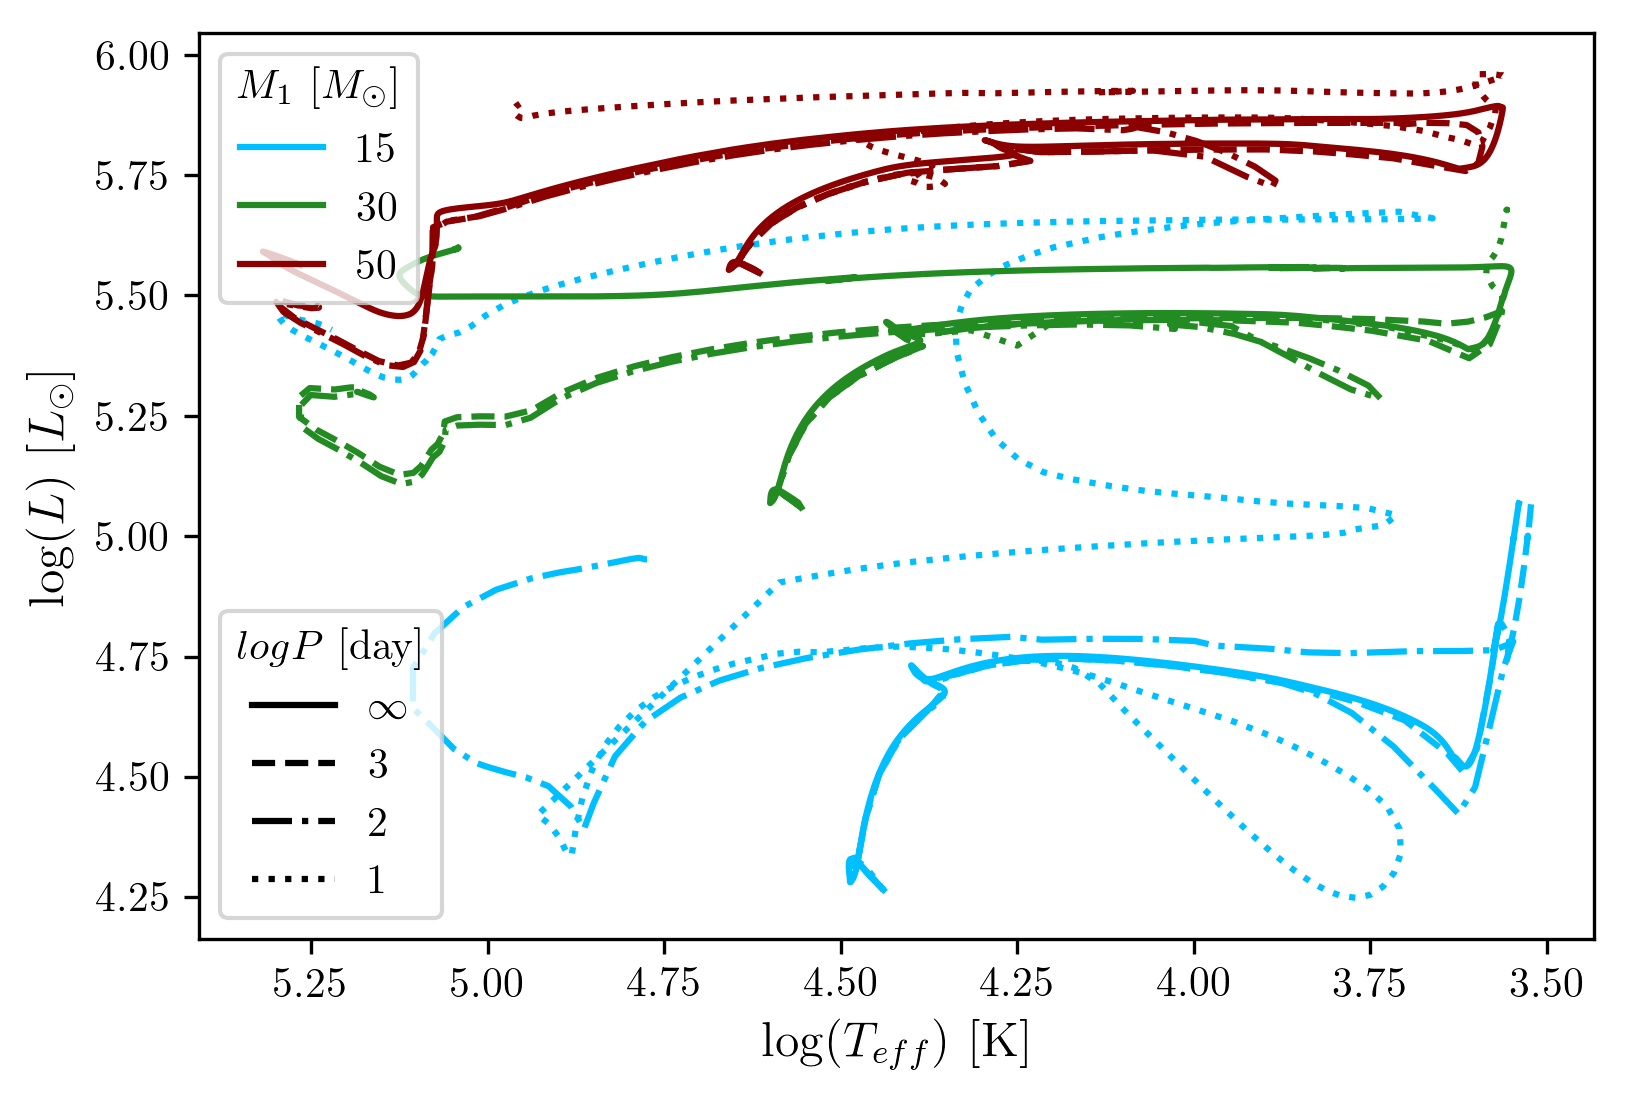

In [2]:
#Lets plot some tracks
plt.figure(dpi=300)
import matplotlib.lines as mlines
masses = [15.0,30.0,50.0]
cols = ['deepskyblue','forestgreen','darkred']
logps = [1.0,2.0,3.0,'inf']
logp_str = [1,2,3,'$\infty$']
styles = [':','-.','--','-']

for m,c in zip(masses,cols):
    for p,s in zip(logps,styles):
        tr = track(bpass_M=m,bpass_q=0.9,bpass_logP=p)
        plt.plot(tr.track['logTe_1'],tr.track['logL_1'],c=c,ls=s)
plt.gca().invert_xaxis()
plt.xlabel('$\log (T_{eff})$ [K]')
plt.ylabel('$\log (L)$ [$L_\odot$]')
leg1 = plt.legend(handles=[mlines.Line2D([], [], color=c,label=str(int(m))) for m,c in zip(masses,cols)],title='$M_1$ [$M_\odot$]',loc=2)
ax = plt.gca().add_artist(leg1)
plt.legend(handles=[mlines.Line2D([], [], color='k',ls=s,label=str(p)) for p,s in zip(logp_str[::-1],styles[::-1])],title='$log P$ [day]',loc=3)
plt.savefig('../plots/hr_diag.eps')

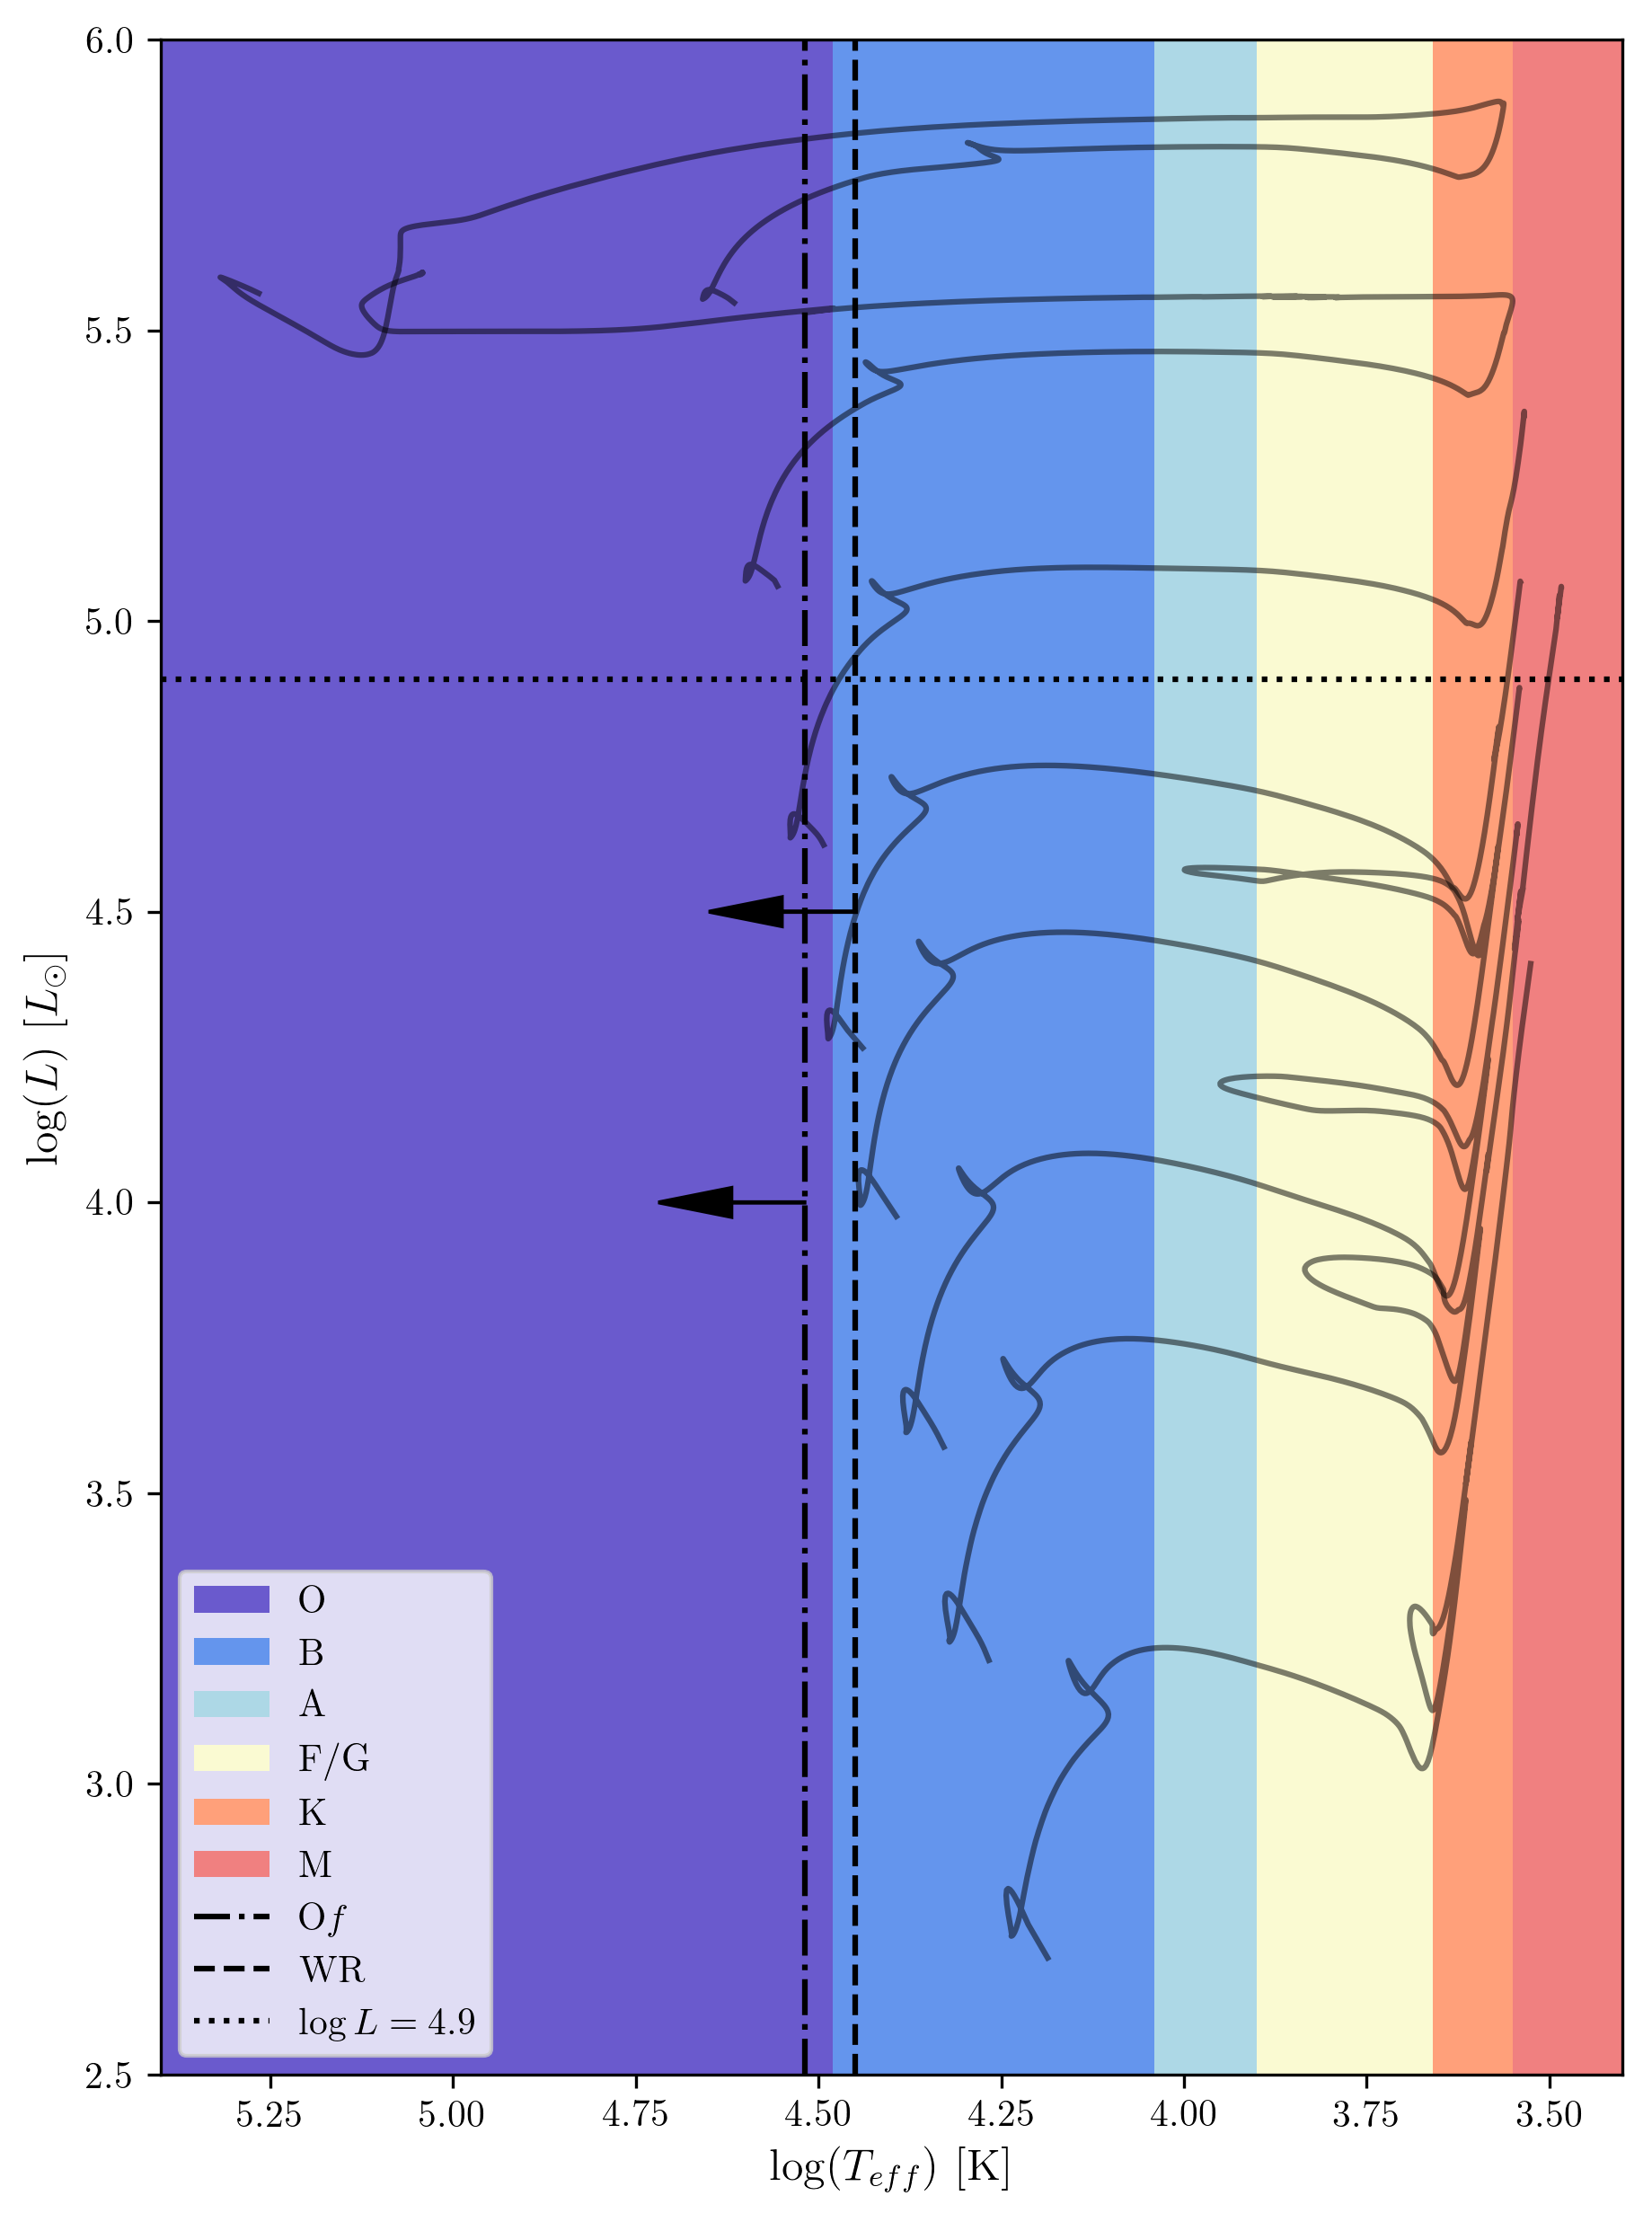

In [3]:
plt.figure(figsize=(7,10),dpi=300)
masses = [5.0,7.0,9.0,12.0,15.0,20.0,30.0,50.0]
for m in masses:
    tr = track(bpass_M=m,bpass_q=0.9,bpass_logP='inf',tracks='BPASS')
    T = tr.track['logTe_1'].data
    L = tr.track['logL_1'].data
    if m == 5.0:
        plt.plot(T[:-53],L[:-53],c='k',alpha=0.5)
    else:
        plt.plot(T,L,c='k',alpha=0.5)
        
plt.axvspan(xmin=4.48,xmax=5.4,facecolor='slateblue',label='O')
plt.axvspan(xmax=4.48,xmin=4.041,facecolor='cornflowerblue',label='B')
plt.axvspan(xmax=4.041,xmin=3.9,facecolor='lightblue',label='A')
plt.axvspan(xmax=3.9,xmin=3.660,facecolor='lightgoldenrodyellow',label='F/G')
plt.axvspan(xmax=3.660,xmin=3.550,facecolor='lightsalmon',label='K')
plt.axvspan(xmax=3.550,xmin=3.4,facecolor='lightcoral',label='M')

plt.axvline(x=4.518,c='k',ls='-.',label='O$f$')
plt.axvline(x=4.45,c='k',ls='--',label='WR')
plt.axhline(y=4.9,c='k',ls=':',label=r'$\log L = 4.9$')
plt.arrow(4.45, 4.5, 0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(4.519, 4, 0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
#plt.arrow(4.25, 4.9, 0, 0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlim(5.4,3.4)
plt.ylim(2.5,6)

plt.xlabel('$\log (T_{eff})$ [K]')
plt.ylabel('$\log (L)$ [$L_\odot$]')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[3:]+handles[:2]+[handles[2]],labels[3:]+labels[:2]+[labels[2]])
plt.savefig('../plots/hr_diag_crit.eps')
plt.savefig('../plots/hr_diag_crit.pdf')